### Imports

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

#### read data

In [2]:
happiness_df = pd.read_csv('2019.csv')

In [3]:
# View the first 5 rows from the dataframe
happiness_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [4]:
# 10-row random view of the dataset
happiness_df.sample(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
22,23,Mexico,6.595,1.070,1.323,0.861,0.433,0.074,0.073
134,135,Swaziland,4.212,0.811,1.149,0.000,0.313,0.074,0.135
70,71,Moldova,5.529,0.685,1.328,0.739,0.245,0.181,0.000
139,140,India,4.015,0.755,0.765,0.588,0.498,0.200,0.085
58,59,Honduras,5.860,0.642,1.236,0.828,0.507,0.246,0.078
37,38,Slovakia,6.198,1.246,1.504,0.881,0.334,0.121,0.014
15,16,Ireland,7.021,1.499,1.553,0.999,0.516,0.298,0.310
147,148,Botswana,3.488,1.041,1.145,0.538,0.455,0.025,0.100
74,75,Croatia,5.432,1.155,1.266,0.914,0.296,0.119,0.022
114,115,Burkina Faso,4.587,0.331,1.056,0.380,0.255,0.177,0.113


##### BASIC INFORMATION ABOUT THE DATASET

In [5]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [6]:
happiness_df.shape

(156, 9)

In [7]:
happiness_df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [8]:
# The dataset statistics
happiness_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000
Score,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769
GDP per capita,156.0,0.905147,0.398389,0.000,0.60275,0.9600,1.23250,1.684
Social support,156.0,1.208814,0.299191,0.000,1.05575,1.2715,1.45250,1.624
Healthy life expectancy,156.0,0.725244,0.242124,0.000,0.54775,0.7890,0.88175,1.141
Freedom to make life choices,156.0,0.392571,0.143289,0.000,0.30800,0.4170,0.50725,0.631
Generosity,156.0,0.184846,0.095254,0.000,0.10875,0.1775,0.24825,0.566
Perceptions of corruption,156.0,0.110603,0.094538,0.000,0.04700,0.0855,0.14125,0.453


In [9]:
# Changing the Overall rank data type to string
happiness_df['Overall rank'] = happiness_df['Overall rank'].astype('str')

### Visualization

In [10]:
# Top 10 happiest countries
happy_10 = happiness_df[['Country or region', 'Score']].head(10)

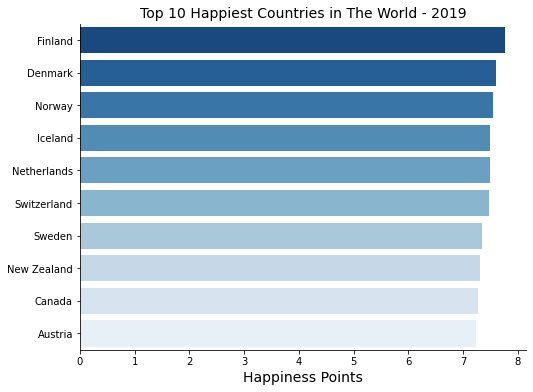

In [11]:
plt.figure(figsize = (8, 6))

ax = sns.barplot(x='Score', y='Country or region', data=happy_10, palette='Blues_r')

sns.set_style("ticks")
sns.despine()

plt.title("Top 10 Happiest Countries in The World - 2019", fontsize = 14)
ax.set_xlabel("Happiness Points", fontsize=14)
ax.set_ylabel("")

plt.show()

In [12]:
unhappy_10 = happiness_df[['Country or region', 'Score']][-10:]

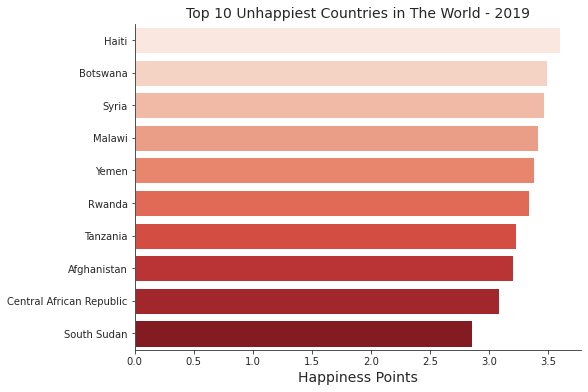

In [13]:
plt.figure(figsize = (8, 6))

ax = sns.barplot(x='Score', y='Country or region', data=unhappy_10, palette='Reds')

sns.set_style("ticks")
sns.despine()

plt.title("Top 10 Unhappiest Countries in The World - 2019", fontsize = 14)
ax.set_xlabel("Happiness Points", fontsize=14)
ax.set_ylabel("")

plt.show()

##### Score variable distribution by country/region

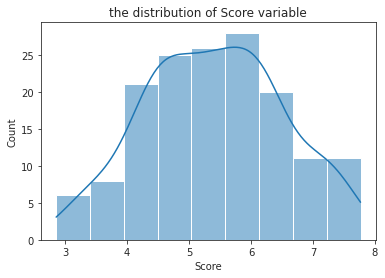

In [14]:
sns.histplot(happiness_df['Score'], kde=True)
plt.title('the distribution of Score variable')
plt.show()

##### Visualizing correlation

In [15]:
correlation = happiness_df.corr()

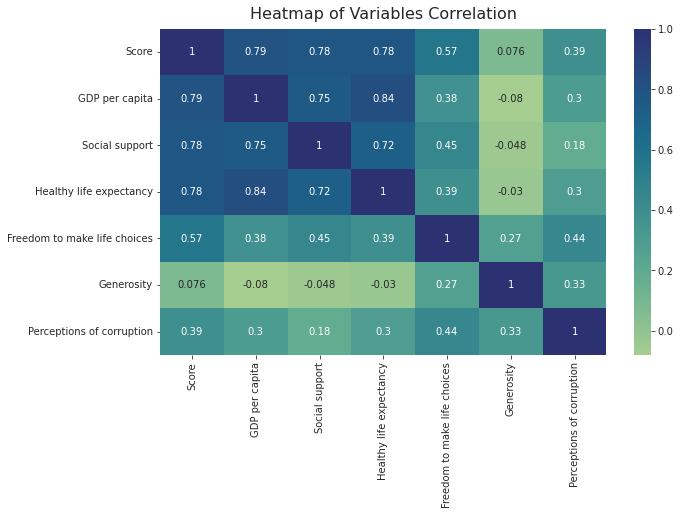

In [16]:
plt.figure(figsize=(10,6))

sns.heatmap(correlation,annot=True,cmap='crest')
plt.title('Heatmap of Variables Correlation', fontsize = 16, pad=10)
plt.show()

#### The relationship between these features is quite clear, because the higher the values of each variable, the higher the Score value. For example: the greater the purchasing power of a nation, the greater the quality of life of living there. This also applies to the other features. 

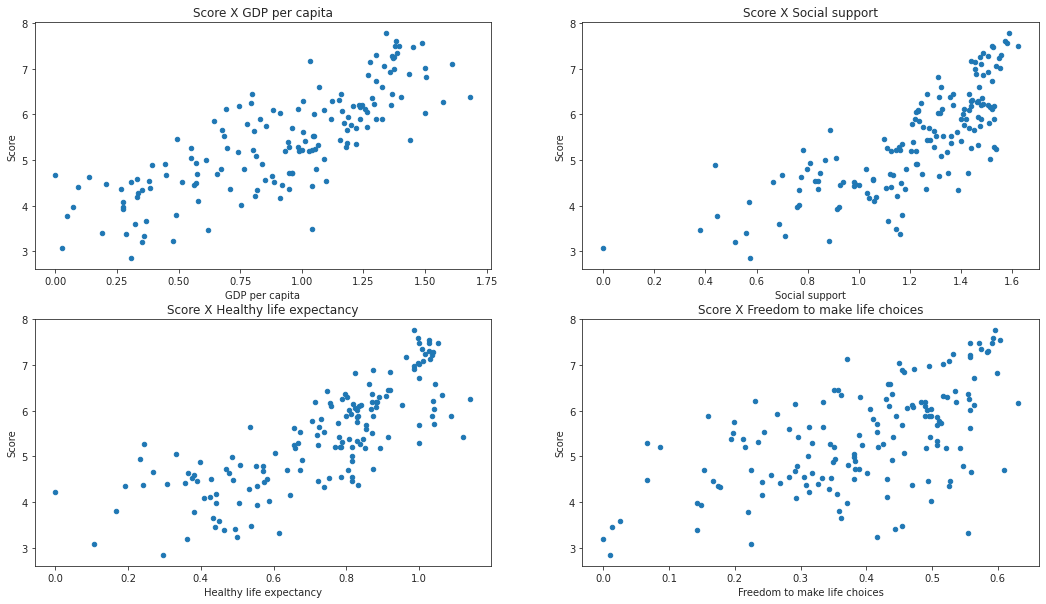

In [17]:
# Relationship between the features that showed the highest correlation with the Score

fix, ax = plt.subplots(2, 2, figsize=(18, 10))

happiness_df.plot.scatter('GDP per capita', 'Score', title='Score X GDP per capita', ax=ax[0,0])

happiness_df.plot.scatter('Social support', 'Score', title='Score X Social support', ax=ax[0,1])

happiness_df.plot.scatter('Healthy life expectancy', 'Score', title='Score X Healthy life expectancy', ax=ax[1,0])

happiness_df.plot.scatter('Freedom to make life choices', 'Score', title='Score X Freedom to make life choices', ax=ax[1,1])
plt.show()

##### GDP per Capita and Happiness

In [18]:
highest_GDP = happiness_df.sort_values(by='GDP per capita', ascending=False)[['Country or region', 'GDP per capita', 'Overall rank']].head(10)

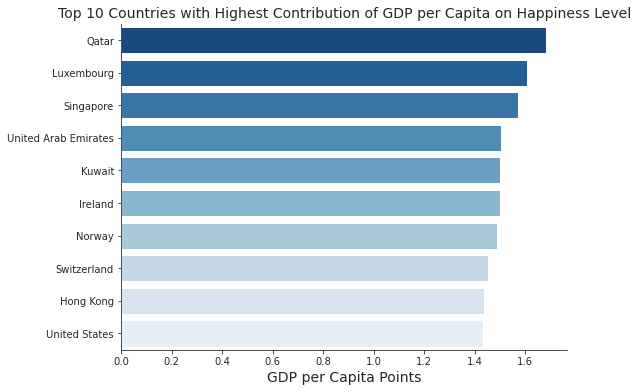

In [19]:
plt.figure(figsize = (8, 6))

ax = sns.barplot(x='GDP per capita', y='Country or region', data=highest_GDP, palette='Blues_r')

sns.set_style("ticks")
sns.despine()

plt.title("Top 10 Countries with Highest Contribution of GDP per Capita on Happiness Level", fontsize = 14)
ax.set_xlabel("GDP per Capita Points", fontsize=14)
ax.set_ylabel("")

plt.show()

In [20]:
lowest_GDP = happiness_df.sort_values(by='GDP per capita')[['Country or region', 'GDP per capita', 'Overall rank']].head(10)

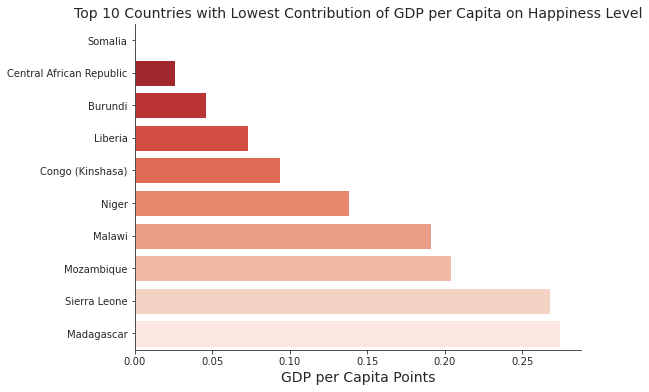

In [21]:
plt.figure(figsize = (8, 6))

ax = sns.barplot(x='GDP per capita', y='Country or region', data=lowest_GDP, palette='Reds_r')

sns.set_style("ticks")
sns.despine()

plt.title("Top 10 Countries with Lowest Contribution of GDP per Capita on Happiness Level", fontsize = 14)
ax.set_xlabel("GDP per Capita Points", fontsize=14)
ax.set_ylabel("")

plt.show()

In [22]:
highest_social_support = happiness_df.sort_values(by='Social support', ascending=False)[['Country or region', 'Social support', 'Overall rank']].head(10)

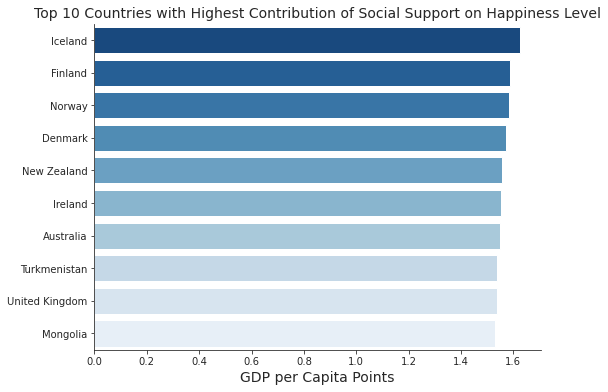

In [23]:
plt.figure(figsize = (8, 6))

ax = sns.barplot(x='Social support', y='Country or region', data=highest_social_support, palette='Blues_r')

sns.set_style("ticks")
sns.despine()

plt.title("Top 10 Countries with Highest Contribution of Social Support on Happiness Level", fontsize = 14)
ax.set_xlabel("GDP per Capita Points", fontsize=14)
ax.set_ylabel("")

plt.show()

In [24]:
lowest_social_support = happiness_df.sort_values(by='Social support')[['Country or region', 'Social support', 'Overall rank']].head(10)

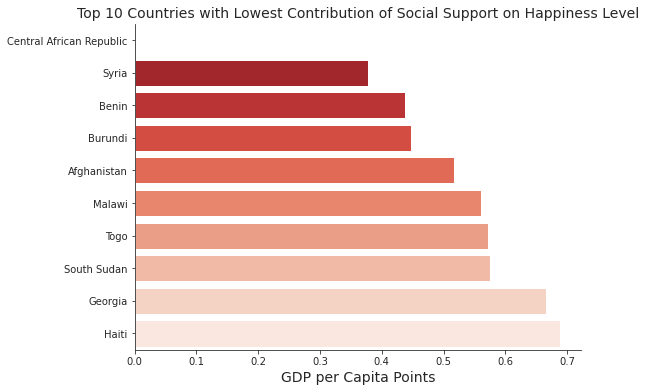

In [25]:
plt.figure(figsize = (8, 6))

ax = sns.barplot(x='Social support', y='Country or region', data=lowest_social_support, palette='Reds_r')

sns.set_style("ticks")
sns.despine()

plt.title("Top 10 Countries with Lowest Contribution of Social Support on Happiness Level", fontsize = 14)
ax.set_xlabel("GDP per Capita Points", fontsize=14)
ax.set_ylabel("")

plt.show()

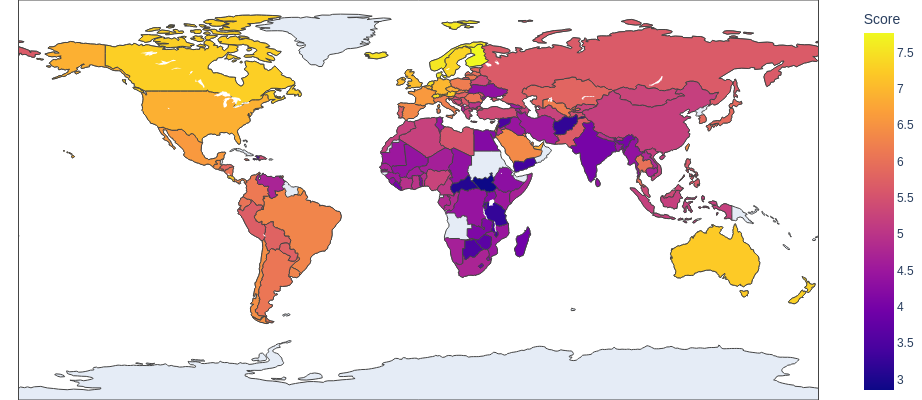

In [26]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.express as px

fig = px.choropleth(happiness_df, locations='Country or region',
                    locationmode = "country names",
                    color="Score",
                    hover_name = 'Country or region',
                    hover_data={'Country or region':False, 'Overall rank': True}
                   )

fig.update_layout(width=900, height=400, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Data preprocessing

In [27]:
training_input_data = happiness_df.drop(['Overall rank', 'Country or region', 'Score'], axis=1)

In [28]:
training_labels = happiness_df['Score']

In [29]:
training_input_data.head(3)

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.340,1.587,0.986,0.596,0.153,0.393
1,1.383,1.573,0.996,0.592,0.252,0.410
2,1.488,1.582,1.028,0.603,0.271,0.341


In [30]:
training_labels.head(3)

0    7.769
1    7.600
2    7.554
Name: Score, dtype: float64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(training_input_data, training_labels, test_size = 0.2, random_state=1)

In [32]:
print(X_train)

     GDP per capita  Social support  Healthy life expectancy  \
66            0.677           0.886                    0.535   
33            1.572           1.463                    1.141   
141           0.274           0.757                    0.505   
59            1.173           1.508                    0.729   
127           0.385           1.105                    0.308   
..              ...             ...                      ...   
133           0.336           1.033                    0.532   
137           0.578           1.058                    0.426   
72            1.051           1.361                    0.871   
140           0.073           0.922                    0.443   
37            1.246           1.504                    0.881   

     Freedom to make life choices  Generosity  Perceptions of corruption  
66                          0.313       0.220                      0.098  
33                          0.556       0.271                      0.453  
141   

### Feature scaling

In [33]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(124, 6) (32, 6) (124,) (32,)


### Training the models

#### I decided to train 4 famous models with the default parameters: the Linear Regression, the Decision Tree Regression, the Random Forest and the Support Vector Regression 

#### Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression

linreg_model = LinearRegression()

In [36]:
linreg_model.fit(X_train, y_train)

LinearRegression()

In [37]:
linreg_model.coef_

array([0.30048915, 0.36793081, 0.24085689, 0.19198326, 0.04030445,
       0.11094257])

In [38]:
linreg_model.intercept_

5.413032258064516

In [39]:
predictions = linreg_model.predict(X_test)

In [40]:
mse = mean_squared_error(y_test, predictions)

rmse = np.sqrt(mse)
print(rmse)

0.42729923649894674


#### Visualizing the model

##### OK. let's see the other models 

<AxesSubplot:xlabel='Score'>

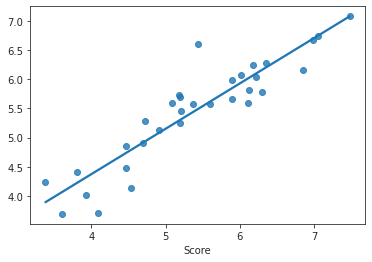

In [41]:
sns.regplot(x=y_test, y=predictions, ci=None)

#### Decision Tree Regression

In [42]:
from sklearn.tree import DecisionTreeRegressor

decreg_model = DecisionTreeRegressor()

In [43]:
decreg_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [44]:
predictions_DT = decreg_model.predict(X_test)

In [45]:
mse = mean_squared_error(y_test, predictions_DT)

rmse = np.sqrt(mse)
print(rmse)

0.6946487421711782


##### Decision Tree Regression is not the best choice for this dataset.

<AxesSubplot:xlabel='Score'>

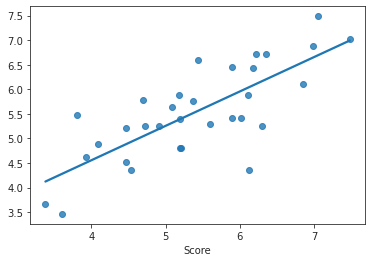

In [46]:
sns.regplot(x=y_test, y=predictions_DT, ci=None)

#### Random Forest

In [47]:
from sklearn.ensemble import RandomForestRegressor

rfreg_model = RandomForestRegressor()

In [48]:
rfreg_model.fit(X_train, y_train)

RandomForestRegressor()

In [49]:
predictions_RF = rfreg_model.predict(X_test)

In [50]:
mse = mean_squared_error(y_test, predictions_RF)

rmse = np.sqrt(mse)
print(rmse)

0.47930068112954965


##### the random forest is also not the best choice

<AxesSubplot:xlabel='Score'>

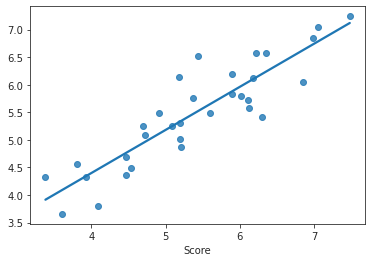

In [51]:
sns.regplot(x=y_test, y=predictions_RF, ci=None)

#### Support Vector Regression

In [52]:
from sklearn.svm import SVR

svreg_model = SVR()

In [53]:
svreg_model.fit(X_train, y_train)

SVR()

In [54]:
predictionsSVR = svreg_model.predict(X_test)

In [55]:
mse = mean_squared_error(y_test, predictionsSVR)

rmse = np.sqrt(mse)
print(rmse)

0.4047763759486929


##### Definitely the SVR seems to be the best choice for this dataset.

<AxesSubplot:xlabel='Score'>

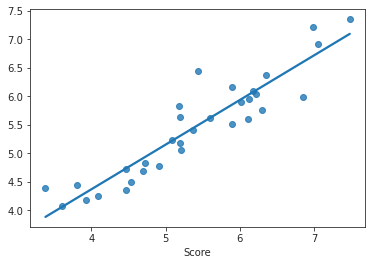

In [56]:
sns.regplot(x=y_test, y=predictionsSVR, ci=None)